<a href="https://colab.research.google.com/github/tamayodb/ndrrmc-typhoon-data-preprocess/blob/main/mapping_nearest_synoptic_station.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## TC Records (2020-2023) Regions 2, 3, 5 and 8


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('TC_most_affected_region.csv')

print(df.shape)

print(df.head().to_markdown(index=False, numalign="left", stralign="left"))

print(df.info())


print("\n=== MISSING VALUES ===")

missing = df.isna().sum().sort_values(ascending=False)
print(missing)

(3425, 18)
| Typhoon Name   | Year   | Region   | Province   | City/Municipality   | Families   | Person   | Brgy   | Dead   | Injured/Ill   | Missing   | Totally   | Partially   | Total   | Quantity   | Cost        | Type                 | Category             |
|:---------------|:-------|:---------|:-----------|:--------------------|:-----------|:---------|:-------|:-------|:--------------|:----------|:----------|:------------|:--------|:-----------|:------------|:---------------------|:---------------------|
| BETTY          | 2023   | 2        | BATANES    | BASCO               | 3608       | 11120    | 6      | nan    | nan           | nan       | nan       | nan         | nan     | 3608       | 2.64618e+06 | ['FAMILY FOOD PACK'] | ['FAMILY FOOD PACK'] |
| BETTY          | 2023   | 2        | BATANES    | ITBAYAT             | 968        | 3028     | 5      | nan    | nan           | nan       | nan       | nan         | nan     | 966        | 494592      | ['FAMILY FOOD PACK'] | 

In [3]:
numeric_cols = df.select_dtypes(include=[np.number]).columns
print("\n=== NUMERIC SUMMARY ===")
print(df[numeric_cols].describe())


=== NUMERIC SUMMARY ===
              Year       Region      Families         Person         Brgy  \
count  3425.000000  3425.000000   3383.000000    3383.000000  3383.000000   
mean   2022.548321     4.230365   2553.911321    9530.615726    10.958912   
std       1.580977     1.986758   6160.861658   22725.251306    12.174312   
min    2020.000000     2.000000      0.000000       0.000000     0.000000   
25%    2021.000000     3.000000     34.000000     124.000000     2.000000   
50%    2023.000000     3.000000    351.000000    1280.000000     7.000000   
75%    2024.000000     5.000000   2088.000000    7948.500000    16.000000   
max    2025.000000     8.000000  80953.000000  335487.000000   152.000000   

             Dead  Injured/Ill     Missing      Totally     Partially  \
count  147.000000   147.000000  147.000000   821.000000    821.000000   
mean     1.605442     4.061224    0.068027   153.574909    673.889160   
std      9.011832     8.615234    0.382133   602.480969   1634

In [4]:
categorical_cols = df.select_dtypes(include=['object']).columns

print("\n=== CATEGORICAL VALUE COUNTS ===")
for col in categorical_cols:
    print(f"\n--- {col} ---")
    print(df[col].value_counts())


=== CATEGORICAL VALUE COUNTS ===

--- Typhoon Name ---
Typhoon Name
PAENG                      413
KRISTINE-LEON              369
NIKA-OFEL-PEPITO           332
ENTENG                     226
ROLLY                      201
CRISING-EMONG-DANTE        194
KARDING                    173
EGAY-FALCON                172
BUTCHOY-CARINA             171
AMBO                       161
QUINTA                     143
DANTE                      133
JOLINA                      85
ODETTE                      80
AGATON                      62
GORING-HANNA-INENG          61
FLORITA                     54
FERDIE-GENER-HELEN-IGME     51
DODONG                      36
MARING                      36
MARCE                       35
PEPITO                      35
AMANG                       32
KIKO                        30
AGHON                       28
FABIAN                      23
BETTY                       18
NENENG                      18
MAYMAY                      17
OBET                         9
O

In [5]:
print("\n=== DUPLICATES ===")
dup_count = df.duplicated().sum()
print(f"Duplicate rows: {dup_count}")


=== DUPLICATES ===
Duplicate rows: 0



=== CORRELATION MATRIX ===
                 Year    Region  Families    Person      Brgy      Dead  \
Year         1.000000 -0.194389  0.180045  0.169948  0.113783  0.064553   
Region      -0.194389  1.000000 -0.008941  0.006540  0.105073  0.108221   
Families     0.180045 -0.008941  1.000000  0.981685  0.470942  0.084908   
Person       0.169948  0.006540  0.981685  1.000000  0.485481  0.090849   
Brgy         0.113783  0.105073  0.470942  0.485481  1.000000  0.268101   
Dead         0.064553  0.108221  0.084908  0.090849  0.268101  1.000000   
Injured/Ill -0.265953  0.226665  0.030882  0.033577  0.079318 -0.071586   
Missing     -0.051957  0.043572 -0.035018 -0.038237 -0.018432  0.172929   
Totally     -0.174458  0.174728  0.294479  0.312037  0.250282 -0.008812   
Partially   -0.184403  0.180219  0.412408  0.441609  0.422046 -0.084653   
Total       -0.195737  0.192522  0.410017  0.438093  0.404776 -0.066954   
Quantity     0.027281  0.137249  0.359788  0.357158  0.312038  0.197450 

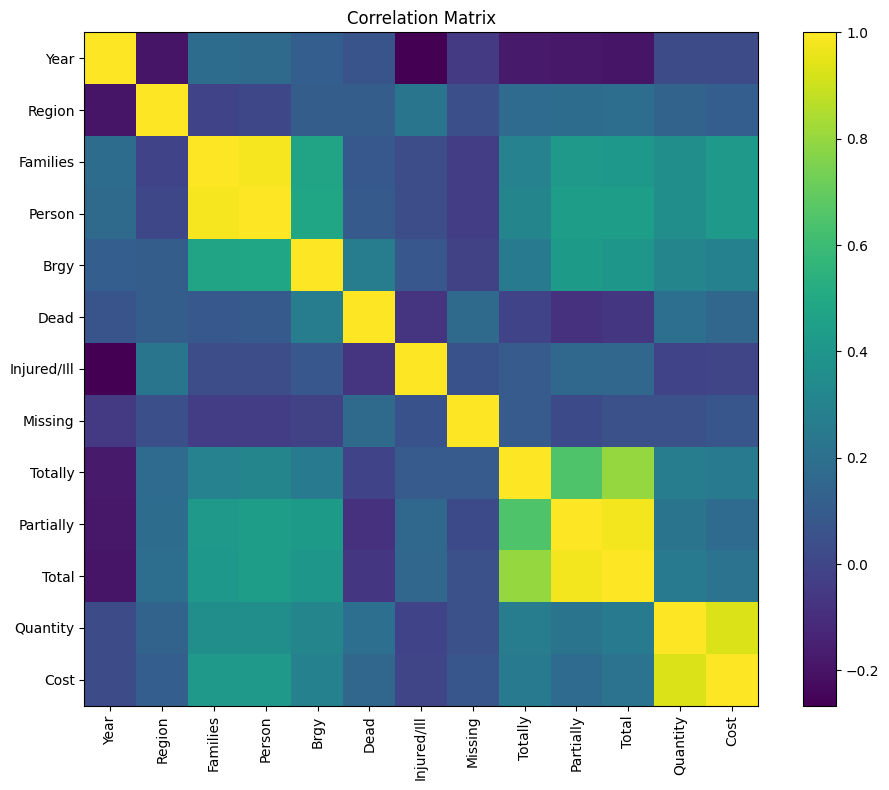

In [6]:
print("\n=== CORRELATION MATRIX ===")
corr = df[numeric_cols].corr()
print(corr)

# Optional heatmap
plt.figure(figsize=(10, 8))
plt.imshow(corr, cmap="viridis", interpolation="nearest")
plt.colorbar()
plt.title("Correlation Matrix")
plt.xticks(range(len(numeric_cols)), numeric_cols, rotation=90)
plt.yticks(range(len(numeric_cols)), numeric_cols)
plt.tight_layout()
plt.show()

## Get Unique Locations for Long-Lat

In [7]:
location_cols = ['Region', 'Province', 'City/Municipality']

df[location_cols] = df[location_cols].astype(str).apply(lambda col: col.str.upper())

unique_locations = df[location_cols].drop_duplicates().dropna()

unique_locations = unique_locations.sort_values(by=location_cols)

print(unique_locations.head(10).to_markdown(index=False, numalign="left", stralign="left"))

duplicate_count = unique_locations.duplicated().sum()
print(f"Duplicate rows: {duplicate_count}")

unique_locations.to_csv('unique_locations.csv', index=False)


| Region   | Province   | City/Municipality   |
|:---------|:-----------|:--------------------|
| 2        | BATANES    | BASCO               |
| 2        | BATANES    | ITBAYAT             |
| 2        | BATANES    | IVANA               |
| 2        | BATANES    | MAHATAO             |
| 2        | BATANES    | SABTANG             |
| 2        | BATANES    | UYUGAN              |
| 2        | CAGAYAN    | ABULUG              |
| 2        | CAGAYAN    | ALCALA              |
| 2        | CAGAYAN    | ALLACAPAN           |
| 2        | CAGAYAN    | AMULUNG             |
Duplicate rows: 0


## GADM Level-2 Shapefile (Municipalities)

In [8]:
import geopandas as gpd

# GADM Level 2 (Municipalities/Cities)
gdf = gpd.read_file("gadm41_PHL_2.shp")

muni = gdf[["NAME_1", "NAME_2", "geometry"]].copy()

muni = muni.rename(columns={
    "NAME_1": "Province",
    "NAME_2": "City_Municipality"
})

# Compute centroid
muni["Longitude"] = muni.geometry.centroid.x
muni["Latitude"] = muni.geometry.centroid.y

muni["Province"] = muni["Province"].str.upper()
muni["City_Municipality"] = muni["City_Municipality"].str.upper()

target_provinces = [
    "BATANES","CAGAYAN","ISABELA","NUEVA VIZCAYA","QUIRINO",
    "AURORA","BATAAN","BULACAN","NUEVA ECIJA","PAMPANGA",
    "TARLAC","ZAMBALES","ALBAY","CAMARINES NORTE",
    "CAMARINES SUR","CATANDUANES","MASBATE","SORSOGON",
    "BILIRAN","EASTERN SAMAR","LEYTE","NORTHERN SAMAR","SAMAR","SOUTHERN LEYTE"
]

muni = muni[ muni["Province"].isin(target_provinces) ]

muni.to_csv("municipality_coordinates_clean.csv", index=False)
print(muni)


DataSourceError: gadm41_PHL_2.shp: No such file or directory

## Get Region 2,3,5,8 Weather Stations for Long-Lat


In [26]:
stations = [
    ("APARRI", "CAGAYAN", 18.355, 121.641),
    ("BALER", "AURORA", 15.757, 121.558),
    ("BASCO", "BATANES", 20.451, 121.970),
    ("BORONGAN", "EASTERN SAMAR", 11.608, 125.431),
    ("CABANATUAN", "NUEVA ECIJA", 15.502, 121.050),
    ("CALAYAN", "CAGAYAN", 19.278, 121.458),
    ("CASIGURAN", "AURORA", 16.283, 122.121),
    ("CATARMAN", "NORTHERN SAMAR", 12.501, 124.637),
    ("CATBALOGAN", "SAMAR", 11.775, 124.886),
    ("CLARK AIRPORT", "PAMPANGA", 15.186, 120.559),
    ("SUBIC BAY", "ZAMBALES", 14.794, 120.271),
    ("DAET", "CAMARINES NORTE", 14.120, 122.950),
    ("GUIUAN", "EASTERN SAMAR", 11.030, 125.722),
    ("IBA", "ZAMBALES", 15.327, 119.975),
    ("ITBAYAT", "BATANES", 20.786, 121.843),
    ("JUBAN", "SORSOGON", 12.849, 123.987),
    ("LEGAZPI CITY", "ALBAY", 13.142, 123.735),
    ("MAASIN", "SOUTHERN LEYTE", 10.131, 124.844),
    ("MASBATE", "MASBATE", 12.371, 123.624),
    ("TACLOBAN", "LEYTE", 11.245, 125.004),
    ("TUGUEGARAO", "CAGAYAN", 17.613, 121.726),
    ("VIRAC", "CATANDUANES", 13.584, 124.237),
]

station_df = pd.DataFrame(stations, columns=["Station", "Province", "Latitude", "Longitude"])


### Haversine Function

In [27]:
import numpy as np

def haversine(lat1, lon1, lat2, lon2):
    R = 6371  # Earth radius in KM

    lat1, lon1, lat2, lon2 = map(np.radians, [lat1, lon1, lat2, lon2])
    dlat = lat2 - lat1
    dlon = lon2 - lon1

    a = np.sin(dlat/2)**2 + np.cos(lat1)*np.cos(lat2)*np.sin(dlon/2)**2
    c = 2 * np.arcsin(np.sqrt(a))

    return R * c


### Compute Distance to Every Station & Pick Nearest

In [28]:
muni_df = pd.read_csv("unique_locations_with_long_lat.csv")

In [29]:
muni_df["Province"] = muni_df["Province"].str.upper()

In [32]:
results = []

for idx, row in muni_df.iterrows():
    muni_lat = row["Latitude"]
    muni_lon = row["Longitude"]

    station_df["Distance_km"] = station_df.apply(
        lambda s: haversine(muni_lat, muni_lon, s["Latitude"], s["Longitude"]),
        axis=1
    )

    if station_df["Distance_km"].isna().all():
        print(f"No valid distance for: {row['City/Municipality']}")
        continue

    nearest = station_df.loc[station_df["Distance_km"].idxmin()]

    results.append({
        "Region": row["Region"],
        "Province": row["Province"],
        "City_Municipality": row["City/Municipality"],
        "Nearest_Station": nearest["Station"],
        "Station_Province": nearest["Province"],
        "Distance_km": nearest["Distance_km"]
    })

nearest_df = pd.DataFrame(results)
nearest_df.to_csv("nearest_stations.csv", index=False)
nearest_df.head(10)

,Region,Province,City_Municipality,Nearest_Station,Station_Province,Distance_km
0,2,BATANES,BASCO,BASCO,BATANES,2.497504
1,2,BATANES,ITBAYAT,ITBAYAT,BATANES,3.204943
2,2,BATANES,IVANA,BASCO,BATANES,9.470554
3,2,BATANES,MAHATAO,BASCO,BATANES,4.890816
4,2,BATANES,SABTANG,BASCO,BATANES,19.891231
5,2,BATANES,UYUGAN,BASCO,BATANES,8.644081
6,2,CAGAYAN,ABULUG,APARRI,CAGAYAN,22.685925
7,2,CAGAYAN,ALCALA,TUGUEGARAO,CAGAYAN,33.479666
8,2,CAGAYAN,ALLACAPAN,APARRI,CAGAYAN,17.431436
9,2,CAGAYAN,AMULUNG,TUGUEGARAO,CAGAYAN,23.457908


## Map of Municipalities + Stations + Nearest Station Lines

In [34]:
muni_locations_df = pd.read_csv('unique_locations_with_long_lat.csv')
nearest_stations_df = pd.read_csv('nearest_stations.csv')

print("=== muni_locations_df Head ===")
print(muni_locations_df.head().to_markdown(index=False, numalign="left", stralign="left"))

print("\n=== nearest_stations_df Head ===")
print(nearest_stations_df.head().to_markdown(index=False, numalign="left", stralign="left"))

=== muni_locations_df Head ===
| Region   | Province   | City/Municipality   | Longitude   | Latitude   |
|:---------|:-----------|:--------------------|:------------|:-----------|
| 2        | BATANES    | BASCO               | 121.993     | 20.4584    |
| 2        | BATANES    | ITBAYAT             | 121.838     | 20.7576    |
| 2        | BATANES    | IVANA               | 121.927     | 20.3761    |
| 2        | BATANES    | MAHATAO             | 121.951     | 20.4107    |
| 2        | BATANES    | SABTANG             | 121.851     | 20.311     |

=== nearest_stations_df Head ===
| Region   | Province   | City_Municipality   | Nearest_Station   | Station_Province   | Distance_km   |
|:---------|:-----------|:--------------------|:------------------|:-------------------|:--------------|
| 2        | BATANES    | BASCO               | BASCO             | BATANES            | 2.4975        |
| 2        | BATANES    | ITBAYAT             | ITBAYAT           | BATANES            | 3.2049

In [35]:
print(station_df.head().to_markdown(index=False, numalign="left", stralign="left"))

| Station    | Province      | Latitude   | Longitude   | Distance_km   |
|:-----------|:--------------|:-----------|:------------|:--------------|
| APARRI     | CAGAYAN       | 18.355     | 121.641     | 965.866       |
| BALER      | AURORA        | 15.757     | 121.558     | 710.988       |
| BASCO      | BATANES       | 20.451     | 121.97      | 1175.08       |
| BORONGAN   | EASTERN SAMAR | 11.608     | 125.431     | 157.178       |
| CABANATUAN | NUEVA ECIJA   | 15.502     | 121.05      | 717.851       |


In [36]:
import folium

# Central coordinates for the Philippines
philippines_center = [12.8797, 121.7740]

m = folium.Map(location=philippines_center, zoom_start=6)

print("Folium map initialized successfully.")

Folium map initialized successfully.


In [44]:
for idx, row in muni_locations_df.iterrows():
    folium.Marker(
        location=[row['Latitude'], row['Longitude']],
        popup=f"<b>Municipality:</b> {row['City/Municipality']}<br><b>Province:</b> {row['Province']}<br><b>Region:</b> {row['Region']}",
        icon=folium.Icon(color='blue', icon='info-sign')
    ).add_to(m)

print("Municipality markers added to the map.")

Municipality markers added to the map.


In [38]:
for idx, row in station_df.iterrows():
    folium.Marker(
        location=[row['Latitude'], row['Longitude']],
        popup=f"<b>Station:</b> {row['Station']}<br><b>Province:</b> {row['Province']}",
        icon=folium.Icon(color='red', icon='cloud')
    ).add_to(m)

print("Weather station markers added to the map.")

Weather station markers added to the map.


In [41]:
for idx, row in nearest_stations_df.iterrows():

    muni_row = muni_locations_df[
        (muni_locations_df['Region'] == row['Region']) &
        (muni_locations_df['Province'] == row['Province']) &
        (muni_locations_df['City/Municipality'] == row['City_Municipality'])
    ]

    if not muni_row.empty:
        muni_lat, muni_lon = muni_row.iloc[0]['Latitude'], muni_row.iloc[0]['Longitude']

        station_row = station_df[
            (station_df['Station'] == row['Nearest_Station']) &
            (station_df['Province'] == row['Station_Province'])
        ]

        if not station_row.empty:
            station_lat, station_lon = station_row.iloc[0]['Latitude'], station_row.iloc[0]['Longitude']

            folium.PolyLine(
                locations=[[muni_lat, muni_lon], [station_lat, station_lon]],
                color='green',
                weight=1,
                popup=f"Distance: {row['Distance_km']:.2f} km"
            ).add_to(m)

print("Lines connecting municipalities to their nearest stations added to the map.")

Lines connecting municipalities to their nearest stations added to the map.


In [42]:
map_file_path = 'philippines_weather_station_coverage.html'
m.save(map_file_path)

print(f"Interactive map saved to {map_file_path}")

Interactive map saved to philippines_weather_station_coverage.html


### Map Summary

The interactive map, `philippines_weather_station_coverage.html`, visualizes the distribution of municipalities within Regions 2, 3, 5, and 8, along with their nearest weather stations.

*   **Municipalities (Blue Markers):** Each blue marker represents a municipality from the `unique_locations_with_long_lat.csv` dataset. Clicking on these markers reveals details such as the municipality name, province, and region.

*   **Weather Stations (Red Cloud Icons):** Red cloud icons indicate the locations of the available weather stations (`station_df`). These stations serve as reference points for environmental data collection.

*   **Coverage Lines (Green Lines):** The green lines connect each municipality to its closest weather station, as determined by the haversine distance calculated in `nearest_stations.csv`. Hovering over these lines displays the calculated distance in kilometers.
